In [1]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import re
import joblib
import ast
#import keras
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns

#Keras
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Input, Dropout

# graphviz
#import graphviz
#from sklearn.tree import export_graphviz

from model_experimentation import read_results
from model_experimentation import extraer_datos
from functions_dataset import convert_to_numeric
from functions_dataset import clean_results_4
from functions_dataset import metrics_comparative,predict_tst_best_model
from graphics import results_graph


#Métricas para predecir
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\agosm\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# Resultados de experimentación de cada approach

In [2]:
columns_numeric = ['mean_train_precision','mean_train_recall','mean_train_f1']

## Approach 1

In [3]:
results_approach_1 = read_results("results_structured_models_mean.txt")
results_approach_1

model mean_validation_precision mean_train_precision  \
0     LR        0.6284715821812596   0.6327135928792721   
1   LRII        0.6303869047619048   0.6346794540223485   
2    LRP        0.6527183745160665   0.7220247743101904   
3   TREE         0.666980056980057   0.6782669139853325   
4  BOOST         0.727438451946092   0.7670001319606007   
5    SVM         0.619476998310157    0.644802805822066   

  mean_validation_recall     mean_train_recall   mean_validation_f1  \
0    0.05234050608416431   0.05332189922061424   0.0965833422346548   
1   0.052881046624704844  0.054576438672578595   0.0975250178962471   
2    0.08978383156303622   0.10090466939715767  0.15767286053102708   
3   0.029206042065292953  0.029319070940931596  0.05588556749727436   
4    0.06905275042344797   0.07343755111056224  0.12608424272586313   
5   0.052293779755384184   0.05445785188650021  0.09642563556654546   

         mean_train_f1  
0  0.09833268375926109  
1  0.10049600631862869  
2  0.17698001201277241  
3  0.05620453882354677  
4  0.13403221904536358  
5  0.10043120505473242

In [4]:
results_approach_1 = convert_to_numeric(results_approach_1,columns_numeric)

In [5]:
results_approach_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model                      6 non-null      object 
 1   mean_validation_precision  6 non-null      object 
 2   mean_train_precision       6 non-null      float64
 3   mean_validation_recall     6 non-null      object 
 4   mean_train_recall          6 non-null      float64
 5   mean_validation_f1         6 non-null      object 
 6   mean_train_f1              6 non-null      float64
dtypes: float64(3), object(4)
memory usage: 464.0+ bytes


### Precision

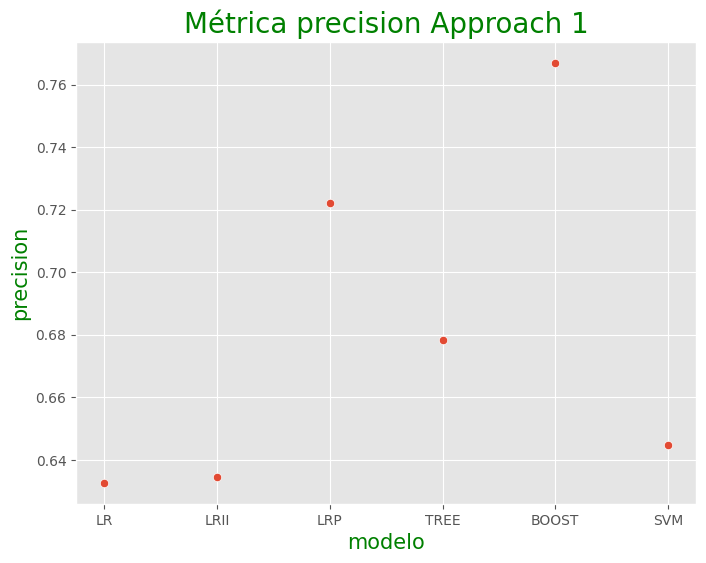

In [ ]:
grap_precision = results_graph('precision',results_approach_1,'1',False)

### Recall

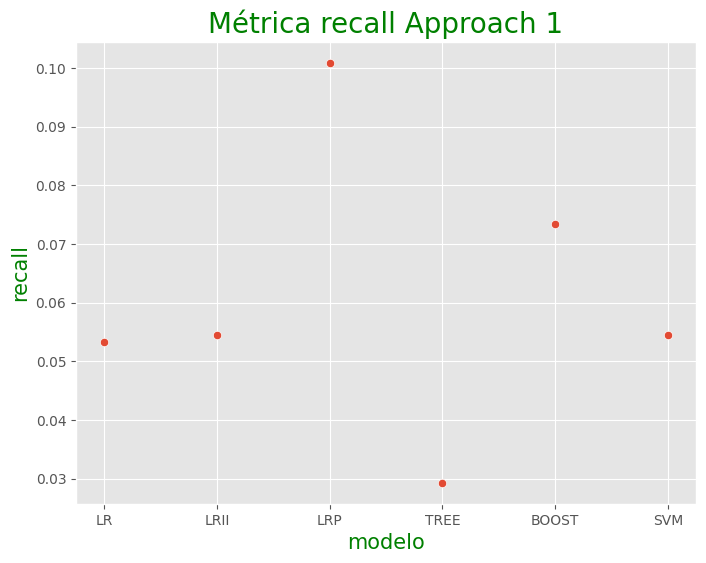

In [ ]:
grap_recall = results_graph('recall',results_approach_1,'1',False)

### Precision y Recall

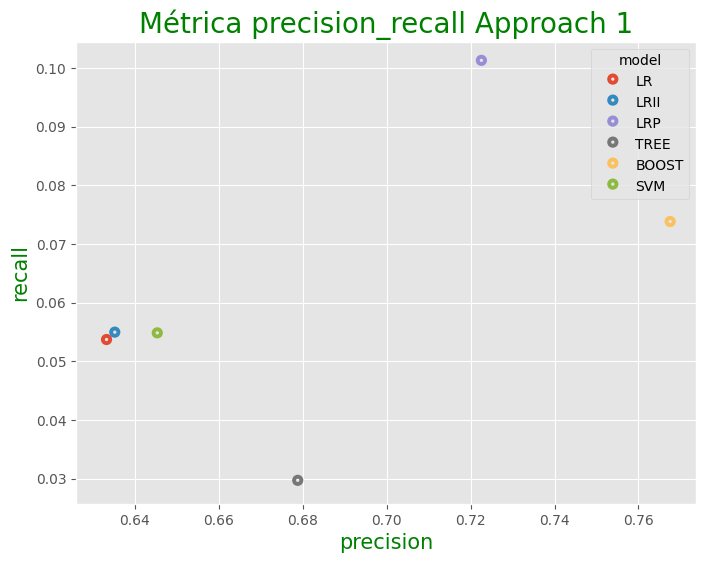

In [ ]:
grap_recall_precision = results_graph('precision_recall',results_approach_1,'1',False)

### Reporte comparativa de métricas

In [6]:
comparative_structured = metrics_comparative (results_approach_1,True,'','')
comparative_structured

model      mean       type
0  BOOST  0.767000  precision
1     LR  0.632714  precision
2   LRII  0.634679  precision
3    LRP  0.722025  precision
4    SVM  0.644803  precision
5   TREE  0.678267  precision
0  BOOST  0.073438     recall
1     LR  0.053322     recall
2   LRII  0.054576     recall
3    LRP  0.100905     recall
4    SVM  0.054458     recall
5   TREE  0.029319     recall
0  BOOST  0.134032         f1
1     LR  0.098333         f1
2   LRII  0.100496         f1
3    LRP  0.176980         f1
4    SVM  0.100431         f1
5   TREE  0.056205         f1

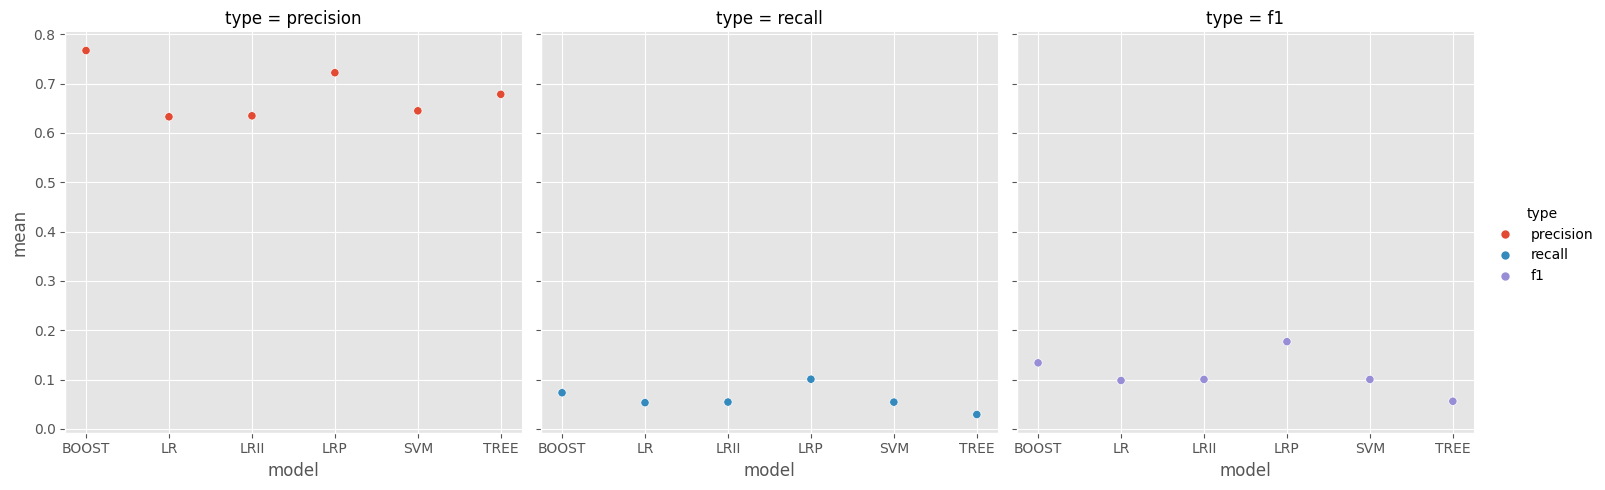

In [ ]:
grap_metrics = results_graph('',comparative_structured,'1',True)

### CONCLUSIONES
Las experimentaciones del Approach 1 (entrenamiento con datos estructurados) arrojaron como resultados lo siguiente:

    Los modelos presentan una precisión entre el 60 y 70 porciento es decir que detectó la falla en caso de prueba al menos el 60% de las veces (el caso falló y detectó que el mismo lo iba a hacer)
    
    En cuanto a la métrica de recall, las mayoría de los modelos predijo un 5%, es decir que de todas las veces que detectó la falla del caso al 5% lo predijo bien
    
    El modelo con mejor métrica de recall es la Regresión Logística Polinómica con un 10% en train
    
    El modelo que peores resultados arroja es la Regresión Logística y Regresión Logística Iterative imputer: ambos con resultados similares    
    
    El segundo mejor algoritmo es Gradient Boosted Tree, con un precision del 76% y recall del casi 7%: es decir que este algoritmo detectó que el 76% de las veces un caso que falló iba a fallar pero solo el 7% de esa predicción la realizó bien (según los resultados arrojados por recall)  
    
    El mejor algoritmo es la Regresión Logística Polinómica con una precisión del 72% y recall del 10%. Si bien este modelo tiene una precisión menor que el BOOST (76% vs 72%) tuvo más aciertos, es decir, del 72% de casos que detectó que iban a fallar acertó el 10% de las veces
    
Por lo tanto el mejor algoritmo para entrenar datos no estructurados en el problema planteado es la Regresión Logística Polinómica (LRP)

## Approach 2

In [7]:
results_approach_2 = read_results("results_no_structured_models_mean.txt")
results_approach_2

model mean_validation_precision mean_train_precision  \
0      LR         0.504932171553208   0.7224157617088114   
1     SVM        0.5233667123040687   0.7307769417950949   
2  FOREST       0.14763625213277207   0.1493928602752889   
3     MNB        0.4096692839166353  0.45059378046279386   

  mean_validation_recall    mean_train_recall   mean_validation_f1  \
0     0.2063085988863572  0.29135740476471883   0.2925320806694801   
1    0.19337782949584287  0.26319673701530244    0.281776905470685   
2     0.9437616333298042   0.9522410391688167  0.25529781154682596   
3    0.30748725155316325     0.33932244368143   0.3510025420983183   

         mean_train_f1  
0   0.4149703377152586  
1   0.3867430581874177  
2   0.2582579777415891  
3  0.38710060038389693

In [8]:
results_approach_2 = convert_to_numeric(results_approach_2,columns_numeric)

### Precision

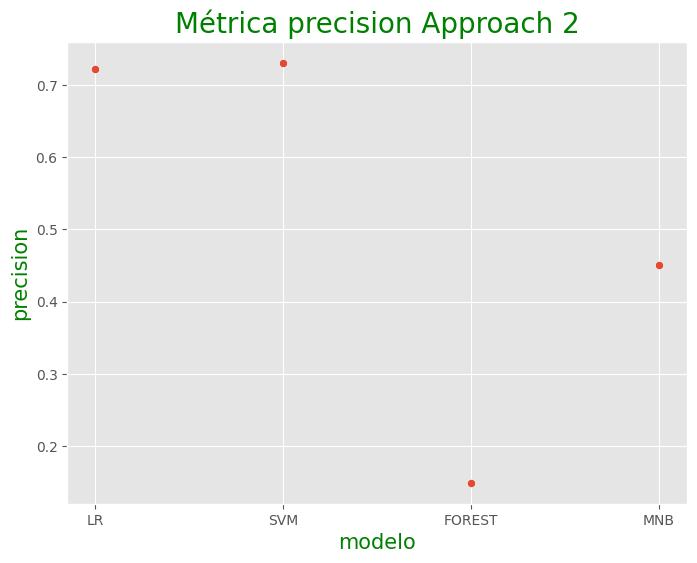

In [ ]:
grap_precision = results_graph('precision',results_approach_2,'2',False)

### Recall

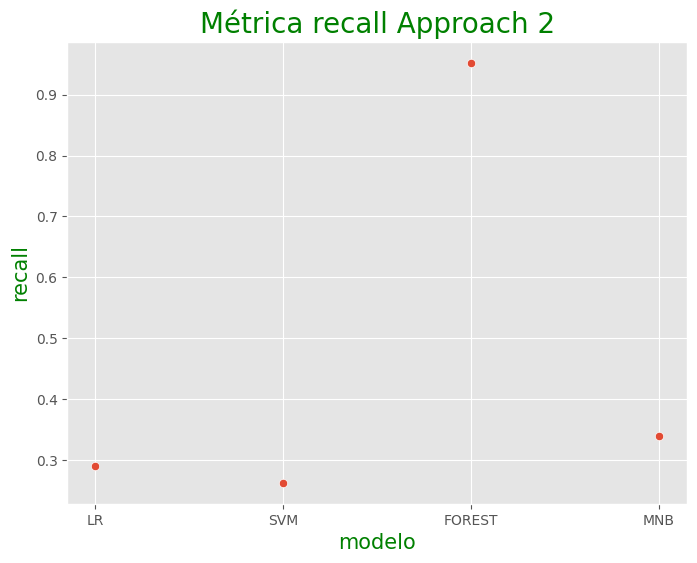

In [ ]:
grap_recall = results_graph('recall',results_approach_2,'2',False)

### Precision y Recall

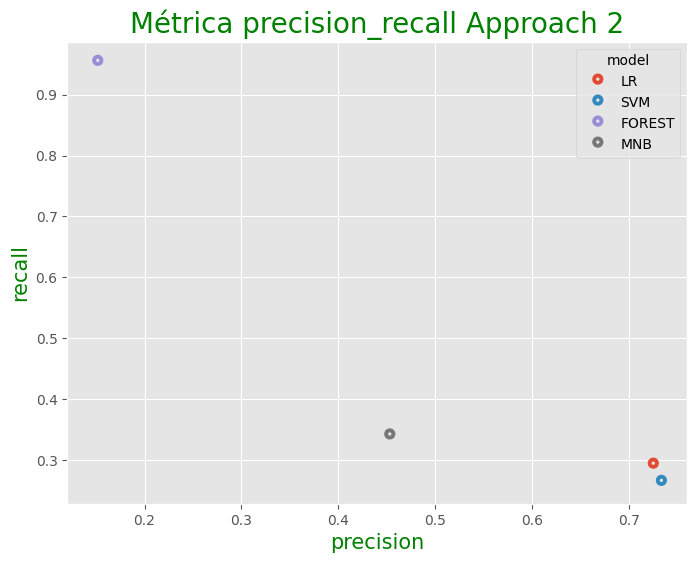

In [ ]:
grap_recall_precision = results_graph('precision_recall',results_approach_2,'2',False)

### Reporte comparativa de métricas

In [9]:
comparative_no_structured = metrics_comparative (results_approach_2,True,'','')
comparative_no_structured

model      mean       type
0  FOREST  0.149393  precision
1      LR  0.722416  precision
2     MNB  0.450594  precision
3     SVM  0.730777  precision
0  FOREST  0.952241     recall
1      LR  0.291357     recall
2     MNB  0.339322     recall
3     SVM  0.263197     recall
0  FOREST  0.258258         f1
1      LR  0.414970         f1
2     MNB  0.387101         f1
3     SVM  0.386743         f1

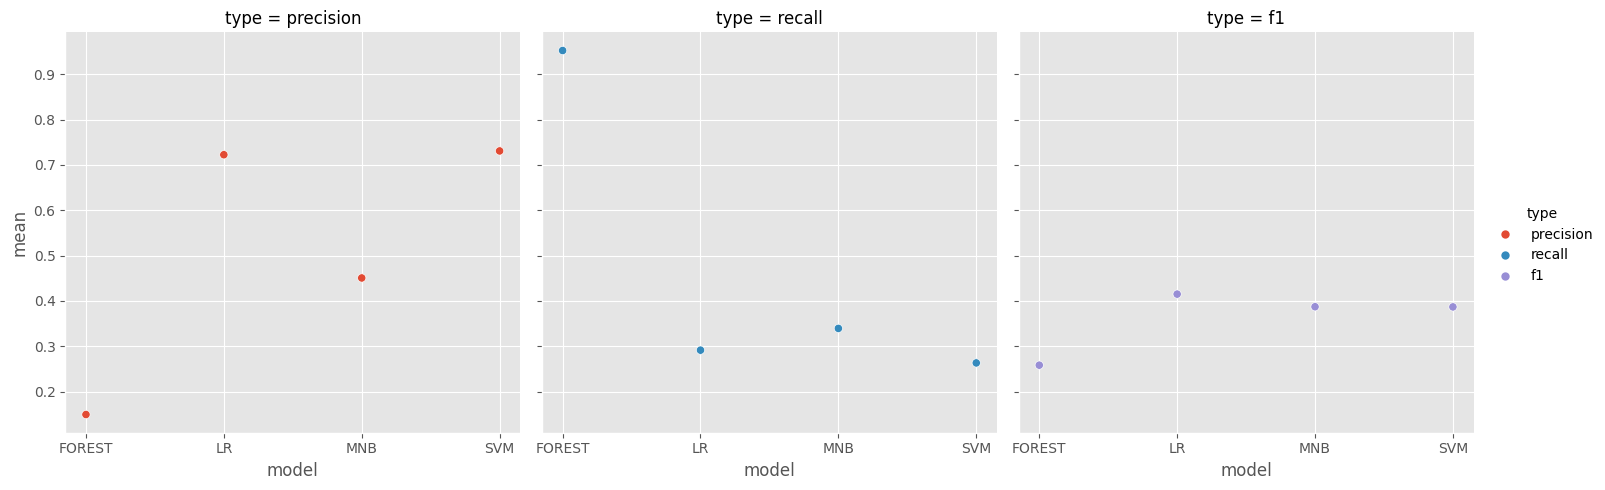

In [ ]:
grap_metrics = results_graph('',comparative_no_structured,'2',True)

### CONCLUSIONES
Las experimentaciones del Approach 2 (entrenamiento con datos no estructurados - Features correspondientes al análisis del texto) arrojaron como resultados lo siguiente:

    Los modelos presentan una precisión muy diversa, mientras algunos superan el 70% otros están por debajo del 50%, arrojando hasta casi 15% de presición
    
    En cuanto a la métrica de recall, las mayoría de los modelos predijo un 5%, es decir que de todas las veces que detectó la falla del caso al 5% lo predijo bien
    
    El modelo con mejor métrica de recall es Random Forest con un 95% en train. La particularidad de este caso es que la precisión del algoritmo es de un 15%, por lo que si bien acertó correctamente si el caso fallaba no lo detectó.
    
    El modelo que peores resultados arroja es Random Forest, la presición es muy baja
    
    El segundo mejor algoritmo es SVM con resultados bastantes cercanos al mejor modelo, este posee mejor precisión
    
    El mejor algoritmo es la Regresión Logística con una precisión del 72% y recall del casi 30%. Si bien este modelo tiene una precisión menor que el SVM (73% vs 72%) tuvo más aciertos, es decir, del 72% de casos que detectó que iban a fallar acertó el 29% de las veces. Aunque el algoritmo SVM obtuvo resultados similares, una precisión mejor y un recall de 26%.
    
Por lo tanto el mejor algoritmo para entrenar datos estructurados en el problema planteado es la Regresión Logística (LR) y SVM

## Approach 3

In [10]:
results_approach_3 = read_results("results_both_models_mean.txt")
results_approach_3

model mean_validation_precision mean_train_precision  \
0  LR_5000_features         0.674549793300435   0.7766555798460637   
1  LR_1000_features        0.6309305335255948   0.6979965412636567   
2               SVM        0.6681605230304225   0.7224382462217818   
3              TREE        0.6355779313293082   0.6783168007985527   
4             BOOST        0.7980452653666973   0.8979595432350779   

  mean_validation_recall     mean_train_recall   mean_validation_f1  \
0    0.15565681089893932   0.18300676867845272   0.2527945176698575   
1    0.12023774438977339    0.1363760725928834   0.2017678274518988   
2    0.08126239387686991    0.0899091522030701  0.14480031347629732   
3    0.03210163915208176  0.034168816161558604  0.06107902843734403   
4    0.09745399939908368   0.11881094669890398  0.17315925826075979   

         mean_train_f1  
0   0.2961007739678384  
1  0.22810064756158233  
2  0.15973326351209147  
3  0.06501330797009197  
4   0.2098242847851298

In [11]:
results_approach_3 = convert_to_numeric(results_approach_3,columns_numeric)

### Precision

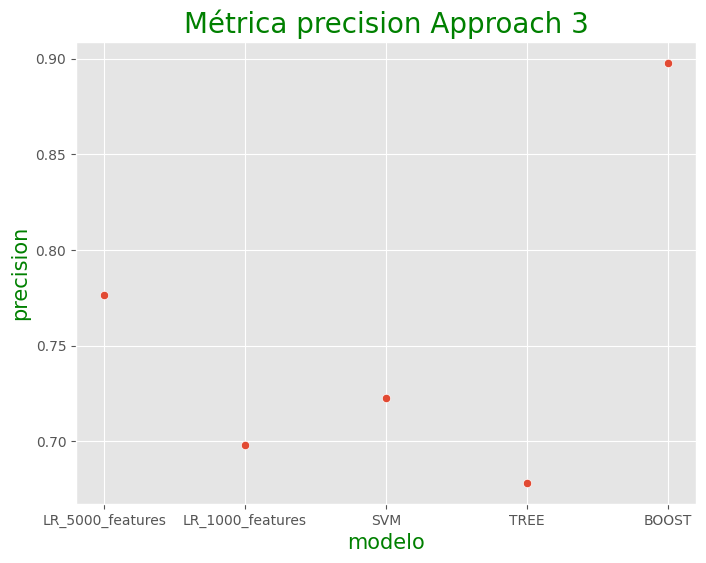

In [ ]:
grap_precision = results_graph('precision',results_approach_3,'3',False)

### Recall

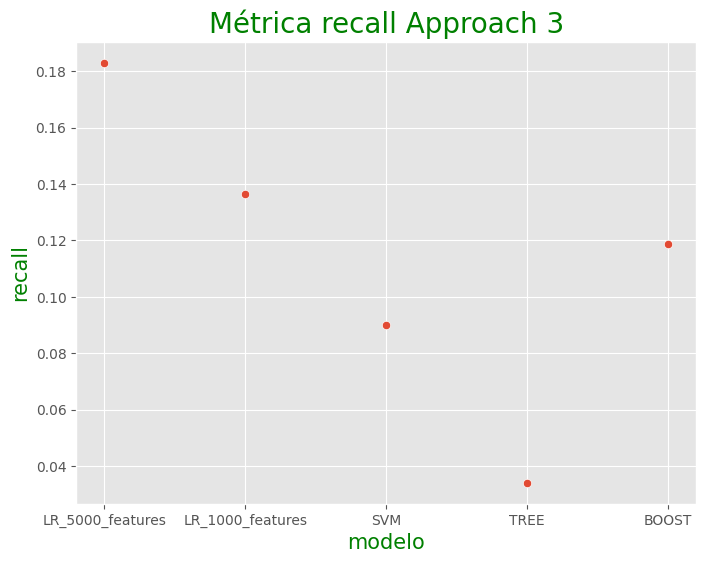

In [ ]:
grap_recall = results_graph('recall',results_approach_3,'3',False)

### Precision y Recall

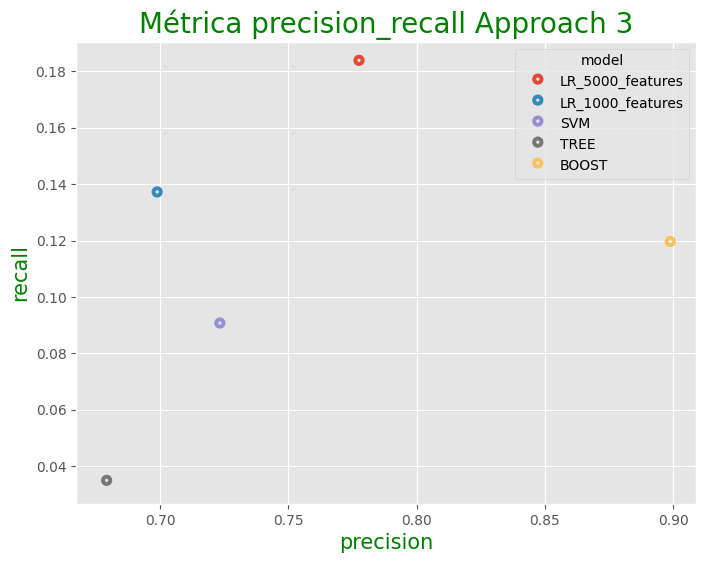

In [ ]:
grap_recall_precision = results_graph('precision_recall',results_approach_3,'3',False)

### Reporte comparativa de métricas

In [12]:
comparative_all = metrics_comparative (results_approach_3,True,'','')
comparative_all

model      mean       type
0             BOOST  0.897960  precision
1  LR_1000_features  0.697997  precision
2  LR_5000_features  0.776656  precision
3               SVM  0.722438  precision
4              TREE  0.678317  precision
0             BOOST  0.118811     recall
1  LR_1000_features  0.136376     recall
2  LR_5000_features  0.183007     recall
3               SVM  0.089909     recall
4              TREE  0.034169     recall
0             BOOST  0.209824         f1
1  LR_1000_features  0.228101         f1
2  LR_5000_features  0.296101         f1
3               SVM  0.159733         f1
4              TREE  0.065013         f1

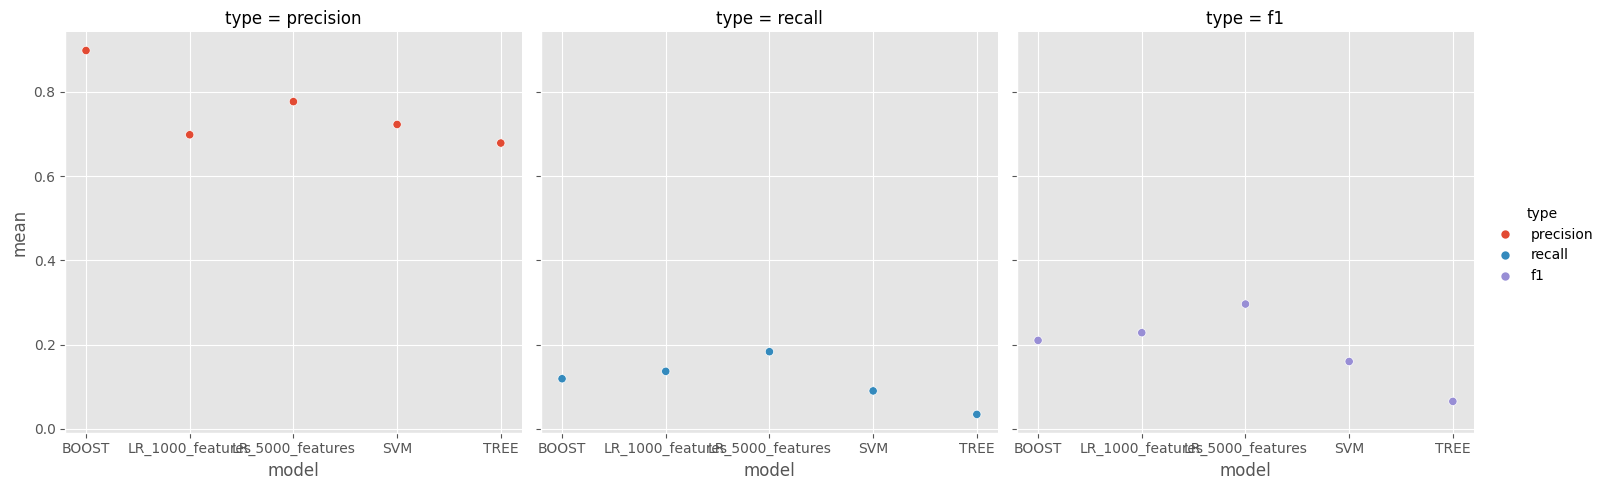

In [ ]:
grap_metrics = results_graph('',comparative_all,'3',True)

### CONCLUSIONES
Las experimentaciones del Approach 3 (entrenamiento con todos los datos, tanto estructurados como no) arrojaron como resultados lo siguiente:

    El modelo de Regresión Logística presenta una mayor precisión a mayor cantidad de features utilizadas para entrenar el mismo, lo cual es lógico, ya que al haber más datos a entrenar mejores serán los resultados
    
    En cuanto a la métrica de recall, las mayoría de los modelos predijo por encima del 8%, excepto el modelo Árbol de decisión cuya métrica fue de 3%
    
    El modelo con mejor métrica de recall es Gradient Boosted Tree con un 89% en train.
    
    El modelo que peores resultados arroja es el Árbol de decisión, la presición es la más baja de todos los modelos entrenados
    
    El segundo mejor algoritmo es SVM, si bien la Regresión Logística entrenada con 5000 features arrijó mejores resultados, si se comparan el resto de algoritmos entrenados con 1000 features, SVM obtuvo métricas que LR.
    
    El mejor algoritmo es la Gradient Boosted Tree con una precisión del 89% y recall de 11%. Este modelo tiene una precisión detectó fallos el 89% de las veces y acertó el 11%.
    
Por lo tanto el mejor algoritmo para entrenar datos estructurados en el problema planteado es la Regresión Logística con 5000 features (LR_5000_features)

## Approach 4

In [12]:
path= 'C:/Users/agosm/Documents/tp_final/results_hibrido_models_mean.txt'

# Extraer los datos
datos_extraidos = extraer_datos(path)

# Convertir el diccionario en un DataFrame
results_4 = pd.DataFrame(datos_extraidos)

# Mostrar el DataFrame
#results_4

mean_fit_time: 11
std_fit_time: 11
mean_score_time: 11
std_score_time: 11
split0_test_precision: 11
split1_test_precision: 11
split2_test_precision: 11
split3_test_precision: 11
split4_test_precision: 11
mean_test_precision: 11
std_test_precision: 11
rank_test_precision: 11
split0_test_recall: 11
split1_test_recall: 11
split2_test_recall: 11
split3_test_recall: 11
split4_test_recall: 11
mean_test_recall: 11
std_test_recall: 11
rank_test_recall: 11
split0_test_f1: 11
split1_test_f1: 11
split2_test_f1: 11
split3_test_f1: 11
split4_test_f1: 11
mean_test_f1: 11
std_test_f1: 11
rank_test_f1: 11
param_weights: 11


In [14]:
results_4.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     134.245298      5.244867         0.575548        0.081410   
1     132.231449      4.405480         0.558607        0.056774   
2     132.184800      6.440687         0.522948        0.069317   
3     129.913964      4.741455         0.478253        0.144873   
4     130.411373      6.983501         0.491672        0.058934   

   split0_test_precision  split1_test_precision  split2_test_precision  \
0               0.532426               0.524271               0.594880   
1               0.540418               0.529138               0.597493   
2               0.551991               0.543166               0.599040   
3               0.563380               0.555860               0.599780   
4               0.576473               0.581456               0.555083   

   split3_test_precision  split4_test_precision  mean_test_precision  ...  \
0               0.561754               0.539616             0.550589  ...   
1               0.566393               0.549577             0.556604  ...   
2               0.573396               0.560742             0.565667  ...   
3               0.575922               0.519554             0.562899  ...   
4               0.582562               0.530183             0.565152  ...   

   rank_test_recall  split0_test_f1  split1_test_f1  split2_test_f1  \
0               3.0        0.416047        0.429731        0.607804   
1               1.0        0.466383        0.477005        0.611594   
2               2.0        0.517857        0.528940        0.606611   
3               4.0        0.558109        0.560970        0.595787   
4               5.0        0.584921        0.586056        0.542615   

   split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0        0.518291        0.486779      0.491730     0.068956          11.0   
1        0.550975        0.526776      0.526547     0.052733          10.0   
2        0.575626        0.567069      0.559221     0.032263           3.0   
3        0.585505        0.508878      0.561850     0.030107           1.0   
4        0.592791        0.501428      0.561562     0.034917           2.0   

                               param_weights  
0                                 [0.0, 1.0]  
1                                 [0.1, 0.9]  
2                                 [0.2, 0.8]  
3  [0.30000000000000004, 0.7000000000000001]  
4                  [0.4, 0.6000000000000001]  

[5 rows x 29 columns]

In [13]:
results_4.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'split4_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1',
       'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1',
       'param_weights'],
      dtype='object')

In [14]:
final_columns = ['mean_test_precision', 'mean_test_recall', 'mean_test_f1','param_weights']
results_approach_4 = clean_results_4(results_4,final_columns)
results_approach_4

mean_train_precision  mean_train_recall  mean_train_f1       model
0               0.550589           0.616648       0.491730  [0.0, 1.0]
1               0.556604           0.620267       0.526547  [0.1, 0.9]
2               0.565667           0.618071       0.559221  [0.2, 0.8]
3               0.562899           0.591798       0.561850  [0.3, 0.7]
4               0.565152           0.578025       0.561562  [0.4, 0.6]
5               0.560631           0.566038       0.554030  [0.5, 0.5]
6               0.579364           0.554365       0.543241  [0.6, 0.4]
7               0.581247           0.550647       0.541778  [0.7, 0.3]
8               0.593949           0.550077       0.541609  [0.8, 0.2]
9               0.592839           0.548232       0.539682  [0.9, 0.1]
10              0.603054           0.548310       0.539792  [1.0, 0.0]

In [15]:
results_approach_4 = convert_to_numeric(results_approach_4,columns_numeric)

### Precision

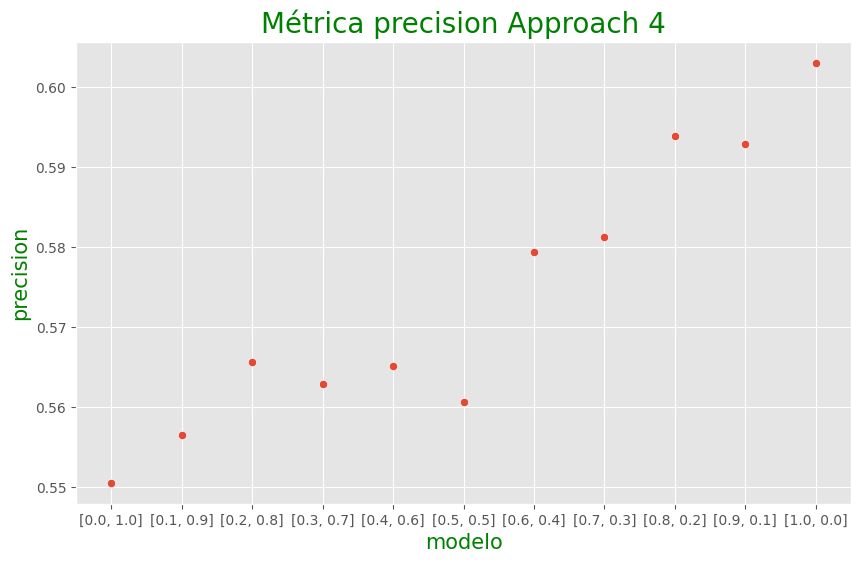

In [7]:
grap_precision = results_graph('precision',results_approach_4,'4',False)

### Recall

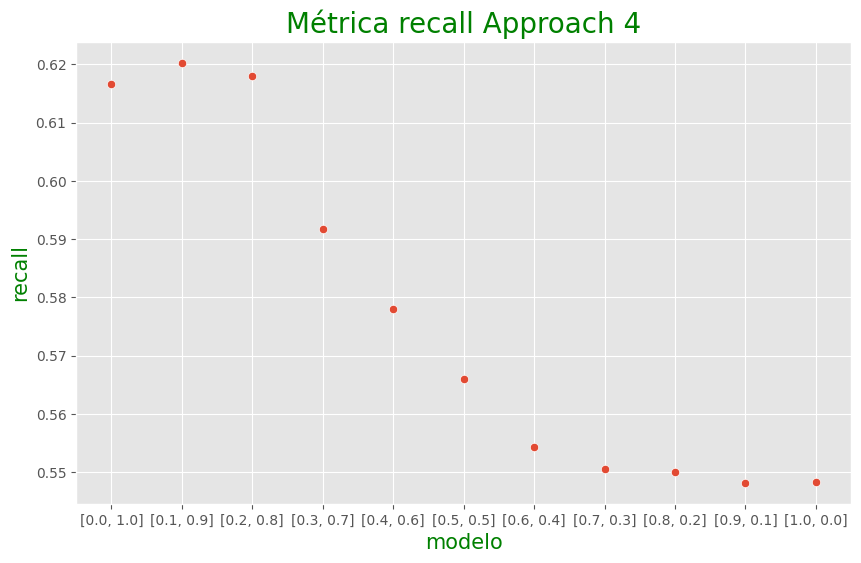

In [8]:
grap_recall = results_graph('recall',results_approach_4,'4',False)

### Precision y Recall

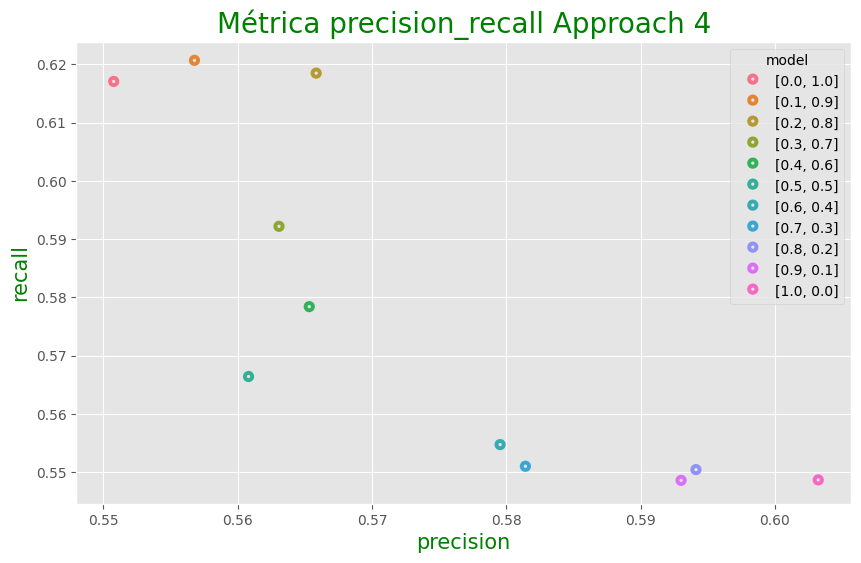

In [9]:
grap_recall_precision = results_graph('precision_recall',results_approach_4,'4',False)

### Reporte comparativa de métricas

In [16]:
comparative_ensemble = metrics_comparative (results_approach_4,True,'','')
comparative_ensemble

model      mean       type
0   [0.0, 1.0]  0.550589  precision
1   [0.1, 0.9]  0.556604  precision
2   [0.2, 0.8]  0.565667  precision
3   [0.3, 0.7]  0.562899  precision
4   [0.4, 0.6]  0.565152  precision
5   [0.5, 0.5]  0.560631  precision
6   [0.6, 0.4]  0.579364  precision
7   [0.7, 0.3]  0.581247  precision
8   [0.8, 0.2]  0.593949  precision
9   [0.9, 0.1]  0.592839  precision
10  [1.0, 0.0]  0.603054  precision
0   [0.0, 1.0]  0.616648     recall
1   [0.1, 0.9]  0.620267     recall
2   [0.2, 0.8]  0.618071     recall
3   [0.3, 0.7]  0.591798     recall
4   [0.4, 0.6]  0.578025     recall
5   [0.5, 0.5]  0.566038     recall
6   [0.6, 0.4]  0.554365     recall
7   [0.7, 0.3]  0.550647     recall
8   [0.8, 0.2]  0.550077     recall
9   [0.9, 0.1]  0.548232     recall
10  [1.0, 0.0]  0.548310     recall
0   [0.0, 1.0]  0.491730         f1
1   [0.1, 0.9]  0.526547         f1
2   [0.2, 0.8]  0.559221         f1
3   [0.3, 0.7]  0.561850         f1
4   [0.4, 0.6]  0.561562         f1
5   [0.5, 0.5]  0.554030         f1
6   [0.6, 0.4]  0.543241         f1
7   [0.7, 0.3]  0.541778         f1
8   [0.8, 0.2]  0.541609         f1
9   [0.9, 0.1]  0.539682         f1
10  [1.0, 0.0]  0.539792         f1

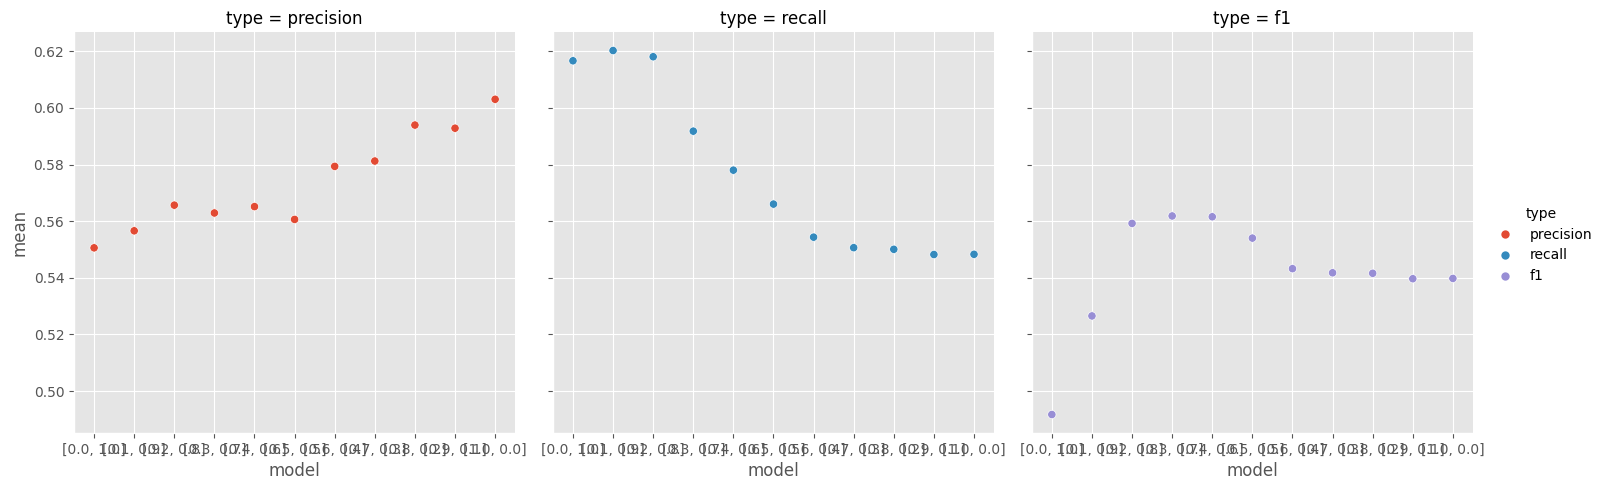

In [11]:
grap_metrics = results_graph('',comparative_ensemble,'4',True)

In [17]:
#Obtener mejor métrica egún F1-SCORE
best_f1_index = results_approach_4['mean_train_f1'].idxmax()

# Obtener la fila correspondiente
best_f1_row = results_approach_4.loc[best_f1_index]
best_f1_row

mean_train_precision      0.562899
mean_train_recall         0.591798
mean_train_f1              0.56185
model                   [0.3, 0.7]
Name: 3, dtype: object

#### CONCLUSIONES

Las experimentaciones del Approach 4 (Ensemble entre approach 1, datos estructurados, y 2, datos no estructurados) arrojaron como resultados lo siguiente:

Al utilizar como modelos los dos algoritmos que mejores resultados presentados (uno para los datos del approach 1 y otro para los datos del approach 2) se observa que en la métrica de Presicion se obtuvieron mejores resultados. Pero no ocurre lo mismo con Recall, ya que la misma bajó

Si se aumentan la cantidad de algoritmos, se mejora Presicion pero Recall empeora

En cuanto a la métrica F1 se observa que al utilizar más modelos la misma baja (en el primer caso es de 0,09% mientras que en el segundo es de 0,06%

### Comparaciones métrcias F1-Score de los distintos escenarios

In [18]:
results_approach_1['approach']  = 'strucutured'
results_approach_2['approach'] = 'no_strucutured'
results_approach_3['approach'] = 'both'
results_approach_4['approach'] = 'ensemble'

In [19]:
df = pd.concat([results_approach_1,results_approach_2,results_approach_3,results_approach_4])
df

model mean_validation_precision  mean_train_precision  \
0                 LR        0.6284715821812596              0.632714   
1               LRII        0.6303869047619048              0.634679   
2                LRP        0.6527183745160665              0.722025   
3               TREE         0.666980056980057              0.678267   
4              BOOST         0.727438451946092              0.767000   
5                SVM         0.619476998310157              0.644803   
0                 LR         0.504932171553208              0.722416   
1                SVM        0.5233667123040687              0.730777   
2             FOREST       0.14763625213277207              0.149393   
3                MNB        0.4096692839166353              0.450594   
0   LR_5000_features         0.674549793300435              0.776656   
1   LR_1000_features        0.6309305335255948              0.697997   
2                SVM        0.6681605230304225              0.722438   
3               TREE        0.6355779313293082              0.678317   
4              BOOST        0.7980452653666973              0.897960   
0         [0.0, 1.0]                       NaN              0.550589   
1         [0.1, 0.9]                       NaN              0.556604   
2         [0.2, 0.8]                       NaN              0.565667   
3         [0.3, 0.7]                       NaN              0.562899   
4         [0.4, 0.6]                       NaN              0.565152   
5         [0.5, 0.5]                       NaN              0.560631   
6         [0.6, 0.4]                       NaN              0.579364   
7         [0.7, 0.3]                       NaN              0.581247   
8         [0.8, 0.2]                       NaN              0.593949   
9         [0.9, 0.1]                       NaN              0.592839   
10        [1.0, 0.0]                       NaN              0.603054   

   mean_validation_recall  mean_train_recall   mean_validation_f1  \
0     0.05234050608416431           0.053322   0.0965833422346548   
1    0.052881046624704844           0.054576   0.0975250178962471   
2     0.08978383156303622           0.100905  0.15767286053102708   
3    0.029206042065292953           0.029319  0.05588556749727436   
4     0.06905275042344797           0.073438  0.12608424272586313   
5    0.052293779755384184           0.054458  0.09642563556654546   
0      0.2063085988863572           0.291357   0.2925320806694801   
1     0.19337782949584287           0.263197    0.281776905470685   
2      0.9437616333298042           0.952241  0.25529781154682596   
3     0.30748725155316325           0.339322   0.3510025420983183   
0     0.15565681089893932           0.183007   0.2527945176698575   
1     0.12023774438977339           0.136376   0.2017678274518988   
2     0.08126239387686991           0.089909  0.14480031347629732   
3     0.03210163915208176           0.034169  0.06107902843734403   
4     0.09745399939908368           0.118811  0.17315925826075979   
0                     NaN           0.616648                  NaN   
1                     NaN           0.620267                  NaN   
2                     NaN           0.618071                  NaN   
3                     NaN           0.591798                  NaN   
4                     NaN           0.578025                  NaN   
5                     NaN           0.566038                  NaN   
6                     NaN           0.554365                  NaN   
7                     NaN           0.550647                  NaN   
8                     NaN           0.550077                  NaN   
9                     NaN           0.548232                  NaN   
10                    NaN           0.548310                  NaN   

    mean_train_f1        approach  
0        0.098333     strucutured  
1        0.100496     strucutured  
2        0.176980     strucutured  
3        0.056205     strucutured  
4        0.134032     stru

In [20]:
columns = ['model','mean_train_f1','approach']
comparation_f1 = metrics_comparative (df,False,columns,False)
comparation_f1

model  mean_train_f1        approach
0                 LR       0.098333     strucutured
1               LRII       0.100496     strucutured
2                LRP       0.176980     strucutured
3               TREE       0.056205     strucutured
4              BOOST       0.134032     strucutured
5                SVM       0.100431     strucutured
0                 LR       0.414970  no_strucutured
1                SVM       0.386743  no_strucutured
2             FOREST       0.258258  no_strucutured
3                MNB       0.387101  no_strucutured
0   LR_5000_features       0.296101            both
1   LR_1000_features       0.228101            both
2                SVM       0.159733            both
3               TREE       0.065013            both
4              BOOST       0.209824            both
0         [0.0, 1.0]       0.491730        ensemble
1         [0.1, 0.9]       0.526547        ensemble
2         [0.2, 0.8]       0.559221        ensemble
3         [0.3, 0.7]       0.561850        ensemble
4         [0.4, 0.6]       0.561562        ensemble
5         [0.5, 0.5]       0.554030        ensemble
6         [0.6, 0.4]       0.543241        ensemble
7         [0.7, 0.3]       0.541778        ensemble
8         [0.8, 0.2]       0.541609        ensemble
9         [0.9, 0.1]       0.539682        ensemble
10        [1.0, 0.0]       0.539792        ensemble

## Comparación mejores algoritmos de cada escenario

In [21]:
columns = ['model','mean_train_precision','mean_train_recall','mean_train_f1','approach']
comparative_best_model = metrics_comparative (df, False,columns,True)
comparative_best_model

model  mean_train_precision  mean_train_recall  mean_train_f1  \
2               LRP              0.722025           0.100905       0.176980   
0                LR              0.722416           0.291357       0.414970   
1               SVM              0.730777           0.263197       0.386743   
0  LR_5000_features              0.776656           0.183007       0.296101   
3        [0.3, 0.7]              0.562899           0.591798       0.561850   

         approach  
2     strucutured  
0  no_strucutured  
1  no_strucutured  
0            both  
3        ensemble

# Entrenamiento dataset de TEST

In [ ]:
#Lectura del dataset

path=  'C:/Users/agosm/Documents/tp_final/'

#se lee el dataset ya con la columna Key con los caracteres transformados

data_test = pd.read_csv(path + 'dataset_test.csv',skipfooter=0, engine='python')
data_test.head(5)

cycle_name                 component            version  priority  \
0  Ejecucion  SSE_Mantenimiento_APNova        Unscheduled       3.0   
1  Ejecucion  SSE_Mantenimiento_APNova   SSE-Nova-Appspre       3.0   
2  Ejecucion  SSE_Mantenimiento_APNova   SSE-Nova-Appspre       3.0   
3  Ejecucion  SSE_Mantenimiento_APNova   SSE-Nova-Appspre       3.0   
4  Ejecucion  SSE_Mantenimiento_APNova  SSE-Nova-Appstest       3.0   

  executed_on  execution_status      bugs_found  \
0  2023-06-10                 0  not_found_bugs   
1  2023-05-10                 1      found_bugs   
2  2023-05-10                 0  not_found_bugs   
3  2023-05-10                 0  not_found_bugs   
4  2023-04-10                 0  not_found_bugs   

                                     test_name_clean  \
0  Archivo adjunto SinieSiniestros NovaRamo 200Mo...   
1                             Boton Nueva Fila Tilde   
2  SinieSiniestros Gestion Actividades SinieSinie...   
3    Grilla Medicosfirmantes certificado Completitud   
4  Caja Banco  Carga comprobante clase M  PersFis...   

                                   test_name_stemmed  \
0  archivo adjunto siniesiniestro novaramo 200mon...   
1                              boton nueva fila tild   
2  siniesiniestro gestion actividad siniesiniestr...   
3      grilla medicosfirmant certificado completitud   
4  caja banco carga comprobant clase m persfisica...   

                                test_name_lemmatized apps  
0  Archivo adjunto SinieSiniestros NovaRamo 200Mo...  NaN  
1                             Boton Nueva Fila Tilde  NaN  
2  SinieSiniestros Gestion Actividades SinieSinie...  NaN  
3    Grilla Medicosfirmantes certificado Completitud  NaN  
4  Caja Banco Carga comprobante clase M PersFisic...  NaN

In [ ]:
#Se importa el mejor modelo
import joblib

best_metric_model = joblib.load('model_train')

In [ ]:
test_result, test_report = predict_tst_best_model(data_test,best_metric_model)

In [ ]:
test_result

{'mean_test_precision': 0.5730557598971082,
 'mean_test_recall': 0.6092030313491219,
 'mean_test_f1': 0.5790613171805679}

In [ ]:
# Calcular y mostrar métricas en el conjunto de prueba
print("Métricas del modelo en el conjunto de prueba:")
print(test_report)

Métricas del modelo en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      7796
           1       0.25      0.42      0.31      1247

    accuracy                           0.75      9043
   macro avg       0.57      0.61      0.58      9043
weighted avg       0.81      0.75      0.77      9043



In [ ]:
test_predictions = best_metric_model.predict(data_test)
test_predictions

# Calcular la matriz de confusión
cm = confusion_matrix(data_test.execution_status, test_predictions)

# Crear el DataFrame de la matriz de confusión
matriz_confusion = pd.DataFrame(cm,
                                 index=['Real Pass', 'Real Fail'],
                                 columns=['Predicción Pass', 'Predicción Fail'])

# Mostrar la matriz de confusión
matriz_confusion

Predicción Pass  Predicción Fail
Real Pass             6229             1567
Real Fail              724              523

In [ ]:
# Calcular métricas
#precision = precision_score(data_test.execution_status, test_predictions, average='macro')
#recall = recall_score(data_test.execution_status, test_predictions, average='macro')
#f1 = f1_score(data_test.execution_status, test_predictions, average='macro')

In [ ]:
# Supongamos que tienes los resultados de CV y las predicciones del modelo
results = best_metric_model.cv_results_  # Ejemplo de resultados de CV
best_model = results['mean_test_f1'].mean()  # F1 Score medio
print("F1 Score medio durante CV: ", best_model)

F1 Score medio durante CV:  0.5419129567388307


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Valores calculados
TP_0 = 6237  # Verdaderos positivos para clase 0
TN = 247     # Verdaderos negativos
FP_0 = 683   # Falsos positivos para clase 0
FN_1 = 723   # Falsos negativos para clase 1
TP_1 = 524   # Verdaderos positivos para clase 1

# Crear la matriz de confusión
cm = [[TP_0, FN_1], [FP_0, TP_1]]

# Crear el DataFrame de la matriz de confusión
matriz_confusion = pd.DataFrame(cm,
                                 index=['Real Pass', 'Real Fail'],
                                 columns=['Predicción Pass', 'Predicción Fail'])

# Mostrar la matriz de confusión
matriz_confusion


Predicción Pass  Predicción Fail
Real Pass             6237              723
Real Fail              683              524